Dataset: https://www.kaggle.com/competitions/playground-series-s4e5/data

- **Thuật toán Linear Regression (Hồi quy tuyến tính)** - 1 cách dễ hiểu
  - **Định nghĩa đơn giản**:
    - Linear Regression là phương pháp dự đoán dựa trên mối quan hệ tuyến tính (mối quan hệ dạng đường thẳng) giữa các yếu tố.
    - Nếu có hai yếu tố mà khi một yếu tố thay đổi thì yếu tố kia cũng thay đổi, Linear Regression sẽ cố gắng vẽ một đường thẳng đi qua dữ liệu đó, từ đó giúp dự đoán giá trị tương lai.
  - **Ví dụ đơn giản**:
    - Giả sử các bạn học sinh để ý thấy rằng càng nhiều thời gian học tập, điểm số có xu hướng càng cao.
    - Linear Regression sẽ cố gắng vẽ một đường thẳng qua các điểm số này để thấy rằng nếu chúng ta dành nhiều thời gian học hơn, điểm số dự đoán sẽ tăng lên.
  - **Ứng dụng vào dự đoán xác suất lũ lụt**:
    - Khi áp dụng vào bài toán dự đoán xác suất lũ, Linear Regression sẽ phân tích mối quan hệ giữa các yếu tố như lượng mưa, khả năng thoát nước, và quản lý sông ngòi.
    - Giả sử, nếu lượng mưa tăng, đường thẳng dự đoán cho thấy khả năng lũ lụt cũng sẽ tăng lên.
    - Khi đó, dự đoán của chúng ta có thể giúp cảnh báo trước về nguy cơ lũ.

1. Difinition
- Linear Regression methodology:
    - Simple Linear Regression: only 1 independent var Y = b0 + b1*X
    - Multi Linear Regression: More than one independent variable   
    Y = m0 + m1X1 + m2X2 + m3X3 + ... + mNXN
    - Polynomial Regression: independent variable of higher order than 1 (for example, order 2, 3)
- Logistic Reg: Classification Problem. (probability prediction of dependent variable based on independent variables.)

2. How Model works:
- In Linear Regression, we need to find the parameter set m_i (i from 0 to N) so that the function Y = f(X) best fits the training data set.

- The process of finding the model parameter: w0, w1, ..., wn set through the training process can use Gradient Descent, Stochastic Gradient Descent or Normal Equation methods by optimizing the MSE loss function.

MSE (Mean Squared Error) loss function formula```MSE = 1/n * (Yi - Ŷi)^2```
In there:
- Yi is the actual output value of the i-th data point;
- Ŷi is the output value predicted by the model with input Xi;
- n is the number of data points in the training set.

# 1. Simple run Linear Regression

In [3]:
# Import các thư viện cần thiết cho project
!pip install pandas numpy scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd # Import thư viện pandas để làm việc với dữ liệu dạng bảng (DataFrame)
import numpy as np # Import thư viện numpy để làm việc với mảng (arrays) và các phép toán đại số tuyến tính
from sklearn.model_selection import train_test_split # Import hàm train_test_split từ sklearn để chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.linear_model import LinearRegression # Import mô hình hồi quy tuyến tính (Linear Regression) từ sklearn
from sklearn.metrics import mean_squared_error, r2_score # Import các hàm tính toán độ lỗi bình phương trung bình (mean_squared_error) và hệ số xác định R^2 (r2_score)
import matplotlib.pyplot as plt # Import thư viện matplotlib để vẽ biểu đồ

# 1. Đọc dữ liệu

In [9]:

# 1. Đọc dữ liệu
# flood_data = pd.read_csv('train.csv')

# Attempt to load the dataset from the first provided path
try:
    flood_data = pd.read_csv('train.csv')
    print("Dataset loaded successfully from Local: 'train.csv'.") 
except FileNotFoundError:
    # If the first path fails, attempt to load from the second path 
    try:
        flood_data = pd.read_csv('/content/train.csv')
        print("Dataset loaded successfully from Google Colab: '/content/train.csv'.") 
    except FileNotFoundError:
        print("Dataset not found in either specified path.")


Dataset loaded successfully from Local: 'train.csv'.


In [6]:
# prompt: in 10 dòng đầu

# Hiển thị 10 dòng đầu tiên của dữ liệu
print(flood_data.head(10))

   id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   
5   5                 5                   4                1              4   
6   6                 8                   3                1              2   
7   7                 6                   6                5              7   
8   8                 5                   2                8              5   
9   9                 4                   2                3              5   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4      

In [7]:
print("Shape của dữ liệu:", flood_data.shape)
print("\nKiểm tra giá trị trùng lặp:")
print(flood_data.duplicated().sum())

Shape của dữ liệu: (1117957, 22)

Kiểm tra giá trị trùng lặp:


0



# 2. Chuẩn bị dữ liệu cho huấn luyện


In [8]:

# 2. Chuẩn bị dữ liệu cho huấn luyện


In [9]:
# prompt: Lọc NaN

# Loại bỏ các hàng có giá trị NaN
flood_data_cleaned = flood_data.dropna()

# In ra kích thước của dữ liệu sau khi loại bỏ NaN
print("Shape của dữ liệu sau khi loại bỏ NaN:", flood_data_cleaned.shape)




Shape của dữ liệu sau khi loại bỏ NaN: (1117957, 22)


In [10]:
X = flood_data.drop('FloodProbability', axis=1)  # Tất cả các features
y = flood_data['FloodProbability']  # Biến mục tiêu

# 3 Train Model

In [11]:
# 3. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [12]:
## 3'
print("\nKích thước tập train/test:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")



Kích thước tập train/test:
X_train shape: (782569, 21)
X_test shape: (335388, 21)


In [13]:
# 4. Tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
## 4' Đánh giá trên tập train
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

In [15]:
# 5. Dự đoán trên tập test
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("\nKết quả đánh giá mô hình:")
print("Tập train:")
print(f"RMSE: {train_rmse:.4f}")
print(f"R2 Score: {train_r2:.4f}")
print("\nTập test:")
print(f"RMSE: {test_rmse:.4f}")
print(f"R2 Score: {test_r2:.4f}")


Kết quả đánh giá mô hình:
Tập train:
RMSE: 0.0201
R2 Score: 0.8449

Tập test:
RMSE: 0.0201
R2 Score: 0.8451


## 3.0 Visulization Kết quả

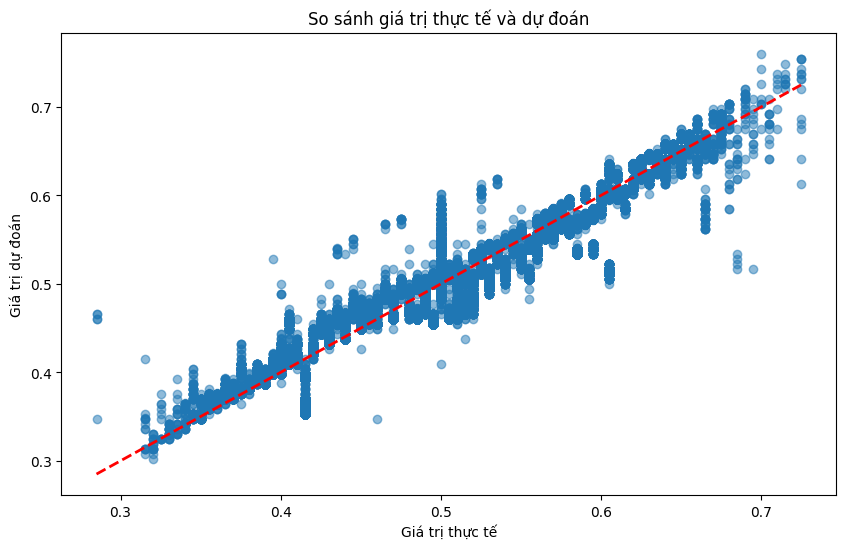

In [19]:
# 6. Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giá trị thực tế và dự đoán')
plt.show()


10 biến có ảnh hưởng lớn nhất:
                 Feature  Coefficient
4          Deforestation     0.005689
17       PopulationScore     0.005685
13  CoastalVulnerability     0.005664
6          ClimateChange     0.005663
7            DamsQuality     0.005659
5           Urbanization     0.005658
3        RiverManagement     0.005655
10         Encroachments     0.005652
20      PoliticalFactors     0.005646
15            Watersheds     0.005646


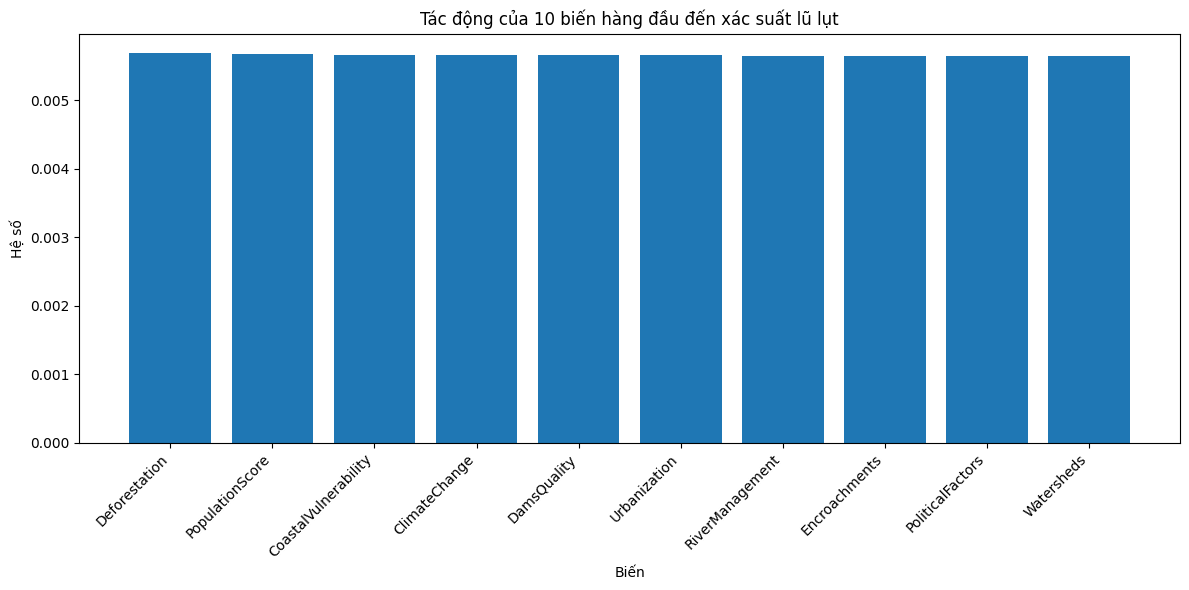

In [20]:
# 7. Phân tích và trực quan hóa các hệ số của mô hình
# Tạo một DataFrame để lưu tên các biến và hệ số tương ứng của chúng
coefficients = pd.DataFrame({
    'Feature': X.columns,  # Tên các biến (features)
    'Coefficient': model.coef_  # Lấy hệ số từ mô hình đã được huấn luyện
})

# Sắp xếp các hệ số theo giá trị tuyệt đối để tìm các biến có ảnh hưởng lớn nhất
# key=abs đảm bảo sắp xếp theo độ lớn bất kể dấu
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)

# Hiển thị 10 biến quan trọng nhất và hệ số của chúng
print('\n10 biến có ảnh hưởng lớn nhất:')
print(coefficients.head(10))

# 8. Tạo biểu đồ cột cho các hệ số của các biến
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Tạo biểu đồ cột sử dụng 10 biến hàng đầu
plt.bar(
    coefficients['Feature'][:10],  # Trục X: tên các biến
    coefficients['Coefficient'][:10]  # Trục Y: giá trị hệ số
)

# Tùy chỉnh giao diện biểu đồ
plt.xticks(rotation=45, ha='right')  # Xoay nhãn biến để dễ đọc hơn
plt.xlabel('Biến')  # Nhãn trục X
plt.ylabel('Hệ số')  # Nhãn trục Y
plt.title('Tác động của 10 biến hàng đầu đến xác suất lũ lụt')  # Tiêu đề biểu đồ

# Điều chỉnh bố cục để tránh cắt nhãn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

## 3.1 Cải thiện hiệu suất model với Lasso and Ridge Regression Method


1. Definition:
- Lasso and Ridge Regression are two regularization methods used to reduce overfitting in Linear Regression model.    
    - Lasso uses L1 regularization: to remove unimportant variables completely BY push the coefficients to zero completely.
    - Ridge uses L2 regularization: to remove unimportant variables incompletely BY push the coefficients close to zero, but never down to zero completely.    
- The choice between these two methods depends on THE NUMBER OF FEATURES AND INFLUENCE OF EACH FEATURE.

2. How model work? similar to Linear Regression with loss function.

And the formula for Lasso Regression loss function is:

$$MSE_{Lasso} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \alpha \sum_{j=1}^{p} |w_j|$$

The formula for Ridge Regression loss function is:

$$MSE_{Ridge} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \alpha \sum_{j=1}^{p} w_j^2$$



- $MSE$ is the mean squared error between the predicted values and the true values.
- $n$ is the number of training samples.
- $p$ is the number of features in the model.
- $y_i$ is the true value of the ith sample.
- $\hat{y_i}$ is the predicted value of the ith sample.
- $w_j$ is the weight corresponding to the jth feature in the model.
- $\alpha$ is the regularization parameter.

### **Lasso và Ridge Regression: Cách giải thích đơn giản**

#### **1. Lasso Regression:**
- **Định nghĩa đơn giản:**
  - Lasso Regression (Least Absolute Shrinkage and Selection Operator) là một phương pháp mở rộng của Linear Regression, giúp giảm thiểu việc mô hình bị quá khớp (overfitting).
  - Thay vì chỉ vẽ một đường thẳng qua dữ liệu, Lasso sẽ tìm cách **loại bỏ hoàn toàn các yếu tố ít quan trọng** bằng cách **đưa hệ số của chúng về 0**.

- **Ví dụ đơn giản:**
  - Giả sử chúng ta đang làm bài tập dự đoán điểm số, nhưng có quá nhiều yếu tố liên quan (thời gian học, chất lượng giáo viên, số lượng bài tập,...).
  - Lasso sẽ tự động loại bỏ những yếu tố ít quan trọng (ví dụ, "số lượng bài tập" có thể không ảnh hưởng đáng kể) để chỉ tập trung vào những yếu tố quan trọng nhất.

- **Cách hoạt động:** 
  - Lasso thêm một hình phạt (penalty) vào phương trình dự đoán, và hình phạt này phụ thuộc vào tổng giá trị tuyệt đối của các hệ số.

---

#### **2. Ridge Regression:**
- **Định nghĩa đơn giản:**
  - Ridge Regression là một phương pháp khác để giảm overfitting, tương tự như Lasso, nhưng thay vì loại bỏ hoàn toàn các yếu tố ít quan trọng, nó **đẩy các hệ số này gần về 0** mà không đưa về 0 hẳn.

- **Ví dụ đơn giản:**
  - Nếu chúng ta dự đoán điểm số với nhiều yếu tố, Ridge sẽ không loại bỏ yếu tố nào hoàn toàn. Thay vào đó, nó giảm mức độ ảnh hưởng của những yếu tố ít quan trọng, để mô hình không phụ thuộc quá nhiều vào chúng.

- **Cách hoạt động:** 
  - Ridge cũng thêm một hình phạt, nhưng hình phạt này phụ thuộc vào bình phương của các hệ số (thay vì giá trị tuyệt đối như Lasso).

---

### **So sánh Lasso và Ridge:**
| **Thuật toán** | **Loại bỏ yếu tố ít quan trọng** | **Tối ưu cho số lượng biến** | **Mức độ giảm overfitting** |
|----------------|-----------------------------------|------------------------------|-----------------------------|
| **Lasso**      | Hoàn toàn đưa hệ số về 0         | Tốt khi có nhiều biến dư thừa| Mạnh hơn (có thể loại bỏ biến)|
| **Ridge**      | Đưa hệ số về gần 0               | Tốt khi tất cả biến đều liên quan| Nhẹ nhàng hơn (giữ tất cả biến)|

---

#### **Ứng dụng vào dự đoán xác suất lũ lụt:**
- **Lasso:** 
  - Nếu có nhiều yếu tố dư thừa (ít ảnh hưởng, ví dụ "chất lượng đất"), Lasso sẽ loại bỏ hoàn toàn những yếu tố này để tập trung vào những yếu tố quan trọng như "lượng mưa" hoặc "khả năng thoát nước".
- **Ridge:** 
  - Giữ lại tất cả các yếu tố nhưng giảm bớt mức độ ảnh hưởng của các yếu tố ít quan trọng để đảm bảo mô hình không quá phụ thuộc vào chúng.


Lasso Regression:
Train RMSE: 0.0510
Train R² Score: 0.0000
Test RMSE: 0.0510
Test R² Score: -0.0000

Ridge Regression:
Train RMSE: 0.0201
Train R² Score: 0.8449
Test RMSE: 0.0201
Test R² Score: 0.8451

Lasso Regression - Top 10 hệ số quan trọng nhất:
                 Feature  Lasso_Coefficient
0                     id      -1.229759e-10
1       MonsoonIntensity       0.000000e+00
2     TopographyDrainage       0.000000e+00
3        RiverManagement       0.000000e+00
4          Deforestation       0.000000e+00
5           Urbanization       0.000000e+00
6          ClimateChange       0.000000e+00
7            DamsQuality       0.000000e+00
8              Siltation       0.000000e+00
9  AgriculturalPractices       0.000000e+00

Ridge Regression - Top 10 hệ số quan trọng nhất:
                 Feature  Ridge_Coefficient
4          Deforestation           0.005689
17       PopulationScore           0.005685
13  CoastalVulnerability           0.005664
6          ClimateChange           0.

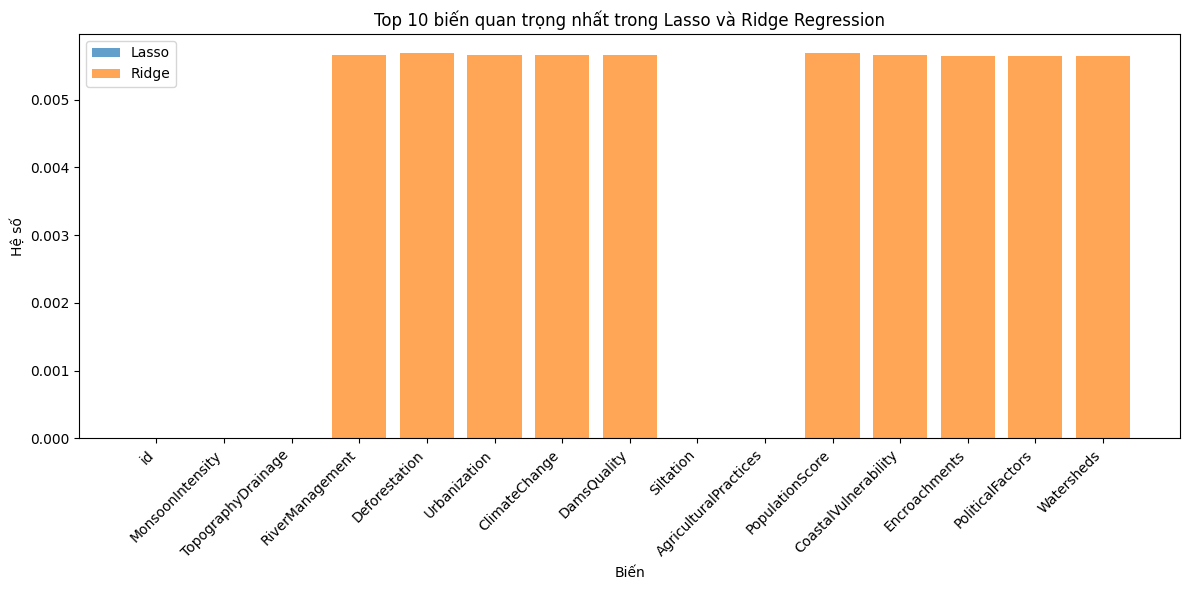

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
X = flood_data.drop('FloodProbability', axis=1)  # Tất cả các features
y = flood_data['FloodProbability']  # Biến mục tiêu

# Chia dữ liệu thành tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện Lasso và Ridge Regression
alpha_value = 1.0  # Tham số điều chỉnh

lasso_model = Lasso(alpha=alpha_value, random_state=42)
lasso_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=alpha_value, random_state=42)
ridge_model.fit(X_train, y_train)

# Dự đoán trên tập train và test
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)

ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

# Đánh giá mô hình
def evaluate_model(name, y_train, y_train_pred, y_test, y_test_pred):
    print(f"\n{name} Regression:")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
    print(f"Train R² Score: {r2_score(y_train, y_train_pred):.4f}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
    print(f"Test R² Score: {r2_score(y_test, y_test_pred):.4f}")

evaluate_model("Lasso", y_train, lasso_train_pred, y_test, lasso_test_pred)
evaluate_model("Ridge", y_train, ridge_train_pred, y_test, ridge_test_pred)

# Hiển thị hệ số của các biến
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Lasso_Coefficient': lasso_model.coef_
}).sort_values(by='Lasso_Coefficient', key=abs, ascending=False)

ridge_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Ridge_Coefficient': ridge_model.coef_
}).sort_values(by='Ridge_Coefficient', key=abs, ascending=False)

print("\nLasso Regression - Top 10 hệ số quan trọng nhất:")
print(lasso_coefficients.head(10))

print("\nRidge Regression - Top 10 hệ số quan trọng nhất:")
print(ridge_coefficients.head(10))

# Vẽ biểu đồ hệ số của các biến (Top 10)
plt.figure(figsize=(12, 6))
plt.bar(lasso_coefficients['Feature'][:10], lasso_coefficients['Lasso_Coefficient'][:10], alpha=0.7, label="Lasso")
plt.bar(ridge_coefficients['Feature'][:10], ridge_coefficients['Ridge_Coefficient'][:10], alpha=0.7, label="Ridge")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Biến')
plt.ylabel('Hệ số')
plt.title('Top 10 biến quan trọng nhất trong Lasso và Ridge Regression')
plt.legend()
plt.tight_layout()
plt.show()


### **So sánh các mô hình**

| **Mô hình**          | **RMSE (Train Dataset)** | **RMSE (Test Dataset)** | **R² Score (Train Dataset)** | **R² Score (Test Dataset)** |
|-----------------------|--------------------------|--------------------------|------------------------------|-----------------------------|
| **Linear Regression** | 0.0201                  | 0.0201                  | 0.8449                       | 0.8451                      |
| **Lasso Regression**  | 0.0510                  | 0.0510                  | 0.0000                       | -0.0000                     |
| **Ridge Regression**  | 0.0201                  | 0.0201                  | 0.8449                       | 0.8451                      |

### **Nhận xét chi tiết hơn:**

1. **Linear Regression:**
   - Hiệu suất trên cả tập train và test đều tốt, với **RMSE ≈ 0.0201** và **R² ≈ 0.845**. Điều này cho thấy mô hình có thể dự đoán chính xác và không bị overfitting hay underfitting.
   - Tuy nhiên, Linear Regression không áp dụng regularization, nên nếu dữ liệu có nhiều biến dư thừa hoặc đa cộng tuyến, hiệu quả có thể giảm.

2. **Ridge Regression:**
   - Hiệu suất tương tự như Linear Regression (RMSE và R² gần như bằng nhau), chứng minh rằng Ridge Regression đã học tốt mối quan hệ giữa các biến.
   - Regularization của Ridge giúp giảm ảnh hưởng của các biến ít quan trọng, tránh overfitting, đặc biệt hữu ích khi có đa cộng tuyến.
   - Đây là lựa chọn tốt hơn Linear Regression nếu dữ liệu phức tạp và có nhiều yếu tố dư thừa.

3. **Lasso Regression:**
   - Hiệu suất kém, với **RMSE cao (≈ 0.0510)** và **R² ≈ 0**, cả trên tập train lẫn test. Điều này cho thấy mô hình không học được mối quan hệ giữa các biến.
   - Lý do: Lasso loại bỏ quá nhiều biến quan trọng (đưa hệ số của chúng về 0). Điều này có thể do tham số `alpha` quá cao.
   - Để cải thiện, cần giảm giá trị `alpha` để giữ lại các biến quan trọng hơn.

---

### **Kết luận:**
- **Ridge Regression** là lựa chọn phù hợp nhất, với hiệu suất tốt và khả năng kiểm soát overfitting.
- **Linear Regression** hoạt động tốt nhưng dễ bị ảnh hưởng nếu dữ liệu có đa cộng tuyến.
- **Lasso Regression** không hiệu quả trong trường hợp này, cần điều chỉnh tham số `alpha` để tối ưu hóa.

## Future Work: Advanced Linear Regression

### **Các kỹ thuật cải thiện Linear Regression**

- **1. Feature Engineering (Kỹ thuật tạo đặc trưng):**
  - Tạo đặc trưng tương tác (Interaction features).
  - Thêm các biến phi tuyến (Polynomial, logarithmic transformations).

- **2. Polynomial Regression (Hồi quy đa thức):**
  - Mở rộng Linear Regression với các đặc trưng đa thức.

- **3. Feature Scaling (Chuẩn hóa dữ liệu):**
  - StandardScaler: Chuẩn hóa giá trị trung bình = 0, độ lệch chuẩn = 1.
  - MinMaxScaler: Đưa dữ liệu về khoảng [0, 1].

- **4. Outlier Detection and Treatment (Xử lý ngoại lai):**
  - Phát hiện ngoại lai bằng Boxplot hoặc Z-score.
  - Loại bỏ hoặc thay thế ngoại lai.

- **5. Regularization Techniques (Kỹ thuật điều chuẩn):**
  - Elastic Net: Kết hợp Lasso (L1) và Ridge (L2).
  - Điều chỉnh tham số alpha bằng Grid Search hoặc Random Search.

- **6. Cross-Validation (Kiểm định chéo):**
  - Sử dụng k-fold cross-validation để đánh giá hiệu suất mô hình.

- **7. Robust Linear Regression:**
  - Sử dụng Huber Regression để giảm ảnh hưởng của ngoại lai.

- **8. Dimensionality Reduction (Giảm số chiều):**
  - Sử dụng PCA để giảm số chiều dữ liệu.

- **9. Ensemble Methods with Linear Regression:**
  - Bagging với Linear Regression để tăng cường độ ổn định.

- **10. Target Transformation (Biến đổi biến mục tiêu):**
  - Áp dụng log hoặc sqrt cho biến mục tiêu để cải thiện phân phối. 


# 3.2 So sánh kết quả 3 model với việc CHUẨN HOÁ DATA

Chuẩn hóa dữ liệu có nghĩa là đưa tất cả các giá trị về một khoảng giống nhau, thường là từ 0 đến 1. 

### **1. Chuẩn hóa là gì?**
Chuẩn hóa là kỹ thuật chuyển đổi các giá trị của dữ liệu về cùng một phạm vi, thường là từ **0 đến 1** hoặc biến đổi để có giá trị trung bình là **0** và độ lệch chuẩn là **1**. 

### **2. Giải thích chuẩn hóa một cách dễ hiểu (Ví dụ về bài toán giá nhà)**

Hãy tưởng tượng chúng ta đang xây dựng một mô hình để **dự đoán giá nhà**, với các yếu tố sau:
- **Diện tích nhà:** Tính bằng **mét vuông**, thường có giá trị từ 50 đến 500 m².
- **Khoảng cách tới trung tâm thành phố:** Tính bằng **kilômét**, thường có giá trị từ 1 đến 50 km.
- **Số phòng ngủ:** Là số nguyên, thường từ 1 đến 5.

---

### **Tại sao cần chuẩn hóa?**

#### **Thang đo không đồng nhất:**
- Diện tích nhà có giá trị từ **50 đến 500**, quá lớn so với các yếu tố khác.
- Khoảng cách tới trung tâm chỉ từ **1 đến 50**.
- Số phòng ngủ từ **1 đến 5**.

Khi mô hình học, nó sẽ coi **diện tích nhà** là yếu tố quan trọng nhất chỉ vì giá trị của nó **lớn hơn**, dù trong thực tế, **khoảng cách tới trung tâm** có thể ảnh hưởng lớn hơn đến giá nhà.

#### **Giải pháp: Chuẩn hóa dữ liệu**
Quy đổi tất cả các yếu tố về cùng một phạm vi (0 đến 1). Ví dụ:
- **Diện tích nhà:** Nếu là 250 m² (giữa khoảng 50-500), sẽ trở thành **0.5**.
- **Khoảng cách tới trung tâm:** Nếu là 25 km (giữa khoảng 1-50), sẽ trở thành **0.5**.
- **Số phòng ngủ:** Nếu là 3 (giữa khoảng 1-5), sẽ trở thành **0.5**.

Khi đó, mô hình sẽ đánh giá các yếu tố **dựa trên mối quan hệ thực sự** thay vì kích thước giá trị của chúng.

---

### **3. Ứng dụng chuẩn hóa vào bài toán dự đoán bão lũ**

Trong bài toán dự đoán xác suất lũ lụt, chúng ta cũng có nhiều yếu tố với **thang đo khác nhau**. Ví dụ:
- **Lượng mưa:** Có giá trị lớn, từ 0 đến vài ngàn mm.
- **Chất lượng đê điều:** Là số điểm từ 0 đến 10.
- **Mật độ dân số:** Có thể dao động từ vài chục đến hàng nghìn người/km².

#### **Vấn đề nếu không chuẩn hóa:**
- **Lượng mưa** có giá trị lớn sẽ được mô hình coi là yếu tố quan trọng nhất, ngay cả khi nó không phải yếu tố quyết định duy nhất.
- Các yếu tố như chất lượng đê điều, dù quan trọng, có giá trị nhỏ hơn, sẽ bị **bỏ qua**.

#### **Lợi ích khi chuẩn hóa:**
- **Tất cả các yếu tố đều được đánh giá công bằng.**
- Mô hình Linear Regression hoặc các biến thể như Ridge, Lasso sẽ chính xác hơn khi tính toán hệ số (coefficients) cho từng yếu tố.
- Giảm nguy cơ mô hình "hiểu nhầm" về tầm quan trọng của các biến.

---

### **Kết luận:**
Chuẩn hóa không chỉ giúp mô hình hoạt động chính xác hơn mà còn đảm bảo rằng các yếu tố trong bài toán **được đánh giá công bằng**. Trong bài toán dự đoán lũ lụt, việc chuẩn hóa các yếu tố như lượng mưa, chất lượng đê điều, và mật độ dân số sẽ giúp mô hình phản ánh đúng thực tế hơn và đưa ra dự đoán đáng tin cậy.

In [5]:
# !pip install ace_tools_open pip install ace-tools

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 8.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load the dataset again for fresh processing
# data_path = 'train.csv'
flood_data = pd.read_csv(data_path)

X = flood_data.drop(columns=['FloodProbability', 'id'])  # Features
y = flood_data['FloodProbability']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42)
}

# Train and evaluate each model
results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predictions on train and test data
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    results.append({
        'Model': name,
        'RMSE (Train)': train_rmse,
        'RMSE (Test)': test_rmse,
        'R2 Score (Train)': train_r2,
        'R2 Score (Test)': test_r2
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Hiển thị DataFrame bằng cách sử dụng print
print(results_df)

# trên .ipynb
from IPython.display import display
display(results_df)

               Model  RMSE (Train)  RMSE (Test)  R2 Score (Train)  \
0  Linear Regression      0.020102     0.020070          0.844897   
1   Lasso Regression      0.051042     0.050988          0.000000   
2   Ridge Regression      0.020102     0.020070          0.844897   

   R2 Score (Test)  
0         0.845070  
1        -0.000001  
2         0.845070  


,Model,RMSE (Train),RMSE (Test),R2 Score (Train),R2 Score (Test)
0,Linear Regression,0.020102,0.020070,0.844897,0.845070
1,Lasso Regression,0.051042,0.050988,0.000000,-0.000001
2,Ridge Regression,0.020102,0.020070,0.844897,0.845070


Với bộ dataset hiện tại, kết quả không cải thiện đáng kể sau khi chuẩn hóa dữ liệu, do các lý do sau:
1. Data các tham số đều nằm trong khoảng từ 0-10. 
Nói cách khác: Dữ liệu ban đầu không có sự khác biệt lớn về thang đo giữa các biến, nên chuẩn hóa sẽ không tạo ra sự khác biệt rõ rệt.